In [ ]:
# Colab Venn Diagram
!pip install -q matplotlib-venn

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from google.colab import files

In [2]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Venndiagram.xlsx to Venndiagram.xlsx


In [3]:
# Read Sheet1
df = data.parse('Sheet2')

In [10]:
display(df.head())

,Gene Name,Sample A,Sample B,Sample C
0,groEL1,1.152500e+09,1.294100e+09,1.173700e+09
1,tuf1,8.150500e+08,9.897300e+08,1.077400e+09
2,rplL,4.102000e+08,6.941900e+08,6.780300e+08
3,atpD,4.137600e+08,4.425300e+08,4.666900e+08
4,Pden_0093,3.244000e+08,4.129800e+08,4.822300e+08


In [ ]:
# Sanity check: ensure expected columns exist
#expected_cols = {"Gene Name", "Sample A", "Sample B", "Sample C"}
#missing = expected_cols - set(df.columns)
#if missing:
    #raise ValueError(f"Missing expected columns: {missing}. Found columns: {list(df.columns)}")

In [11]:
# Define presence rule
THRESH = 0   # treat values > THRESH as present
set_A = set(df.loc[df["Sample A"].notna() & (df["Sample A"] > THRESH), "Gene Name"].astype(str))
set_B = set(df.loc[df["Sample B"].notna() & (df["Sample B"] > THRESH), "Gene Name"].astype(str))
set_C = set(df.loc[df["Sample C"].notna() & (df["Sample C"] > THRESH), "Gene Name"].astype(str))

In [12]:
# Build & save Venn diagram
only_A = len(set_A - set_B - set_C)
only_B = len(set_B - set_A - set_C)
A_B    = len((set_A & set_B) - set_C)
only_C = len(set_C - set_A - set_B)
A_C    = len((set_A & set_C) - set_B)
B_C    = len((set_B & set_C) - set_A)
A_B_C  = len(set_A & set_B & set_C)

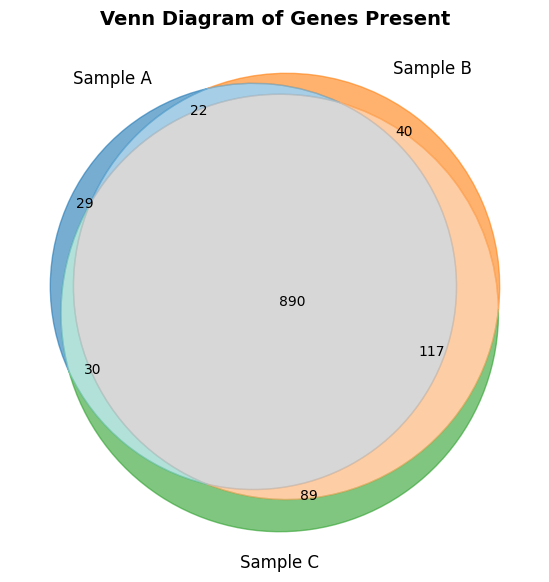

In [16]:
# Plot
plt.figure(figsize=(7,7))
v = venn3(subsets=(only_A, only_B, A_B, only_C, A_C, B_C, A_B_C),
          set_labels=("Sample A", "Sample B", "Sample C"))


# Apply custom colors
v.get_patch_by_id('100').set_color('#1f77b4')  # A only (blue)
v.get_patch_by_id('010').set_color('#ff7f0e')  # B only (orange)
v.get_patch_by_id('001').set_color('#2ca02c')  # C only (green)
v.get_patch_by_id('110').set_color('#6baed6')  # A∩B
v.get_patch_by_id('101').set_color('#80cdc1')  # A∩C
v.get_patch_by_id('011').set_color('#fdae6b')  # B∩C
v.get_patch_by_id('111').set_color('#bdbdbd')  # A∩B∩C


# set transparency for all areas
for patch in v.patches:
    if patch:
        patch.set_alpha(0.6)

plt.title("Venn Diagram of Genes Present", fontsize=14, fontweight='bold')

# Save outputs
png_path = "Venn_Sheet1_colored.png"
pdf_path = "Venn_Sheet1_colored.pdf"
plt.savefig(png_path, dpi=600, format="png")
plt.savefig(pdf_path, format="pdf")
plt.show()

In [17]:
# Define a function to get genes for a given subset
def genes_for(subset_id):
    if subset_id == '100':
        return list(set_A - set_B - set_C)
    elif subset_id == '010':
        return list(set_B - set_A - set_C)
    elif subset_id == '001':
        return list(set_C - set_A - set_B)
    elif subset_id == '110':
        return list((set_A & set_B) - set_C)
    elif subset_id == '101':
        return list((set_A & set_C) - set_B)
    elif subset_id == '011':
        return list((set_B & set_C) - set_A)
    elif subset_id == '111':
        return list(set_A & set_B & set_C)
    else:
        return []

# Export gene lists
pd.Series(genes_for('100')).to_csv("only_A.csv", index=False, header=["Gene"])
pd.Series(genes_for('010')).to_csv("only_B.csv", index=False, header=["Gene"])
pd.Series(genes_for('001')).to_csv("only_C.csv", index=False, header=["Gene"])
pd.Series(genes_for('110')).to_csv("A_B.csv", index=False, header=["Gene"])
pd.Series(genes_for('101')).to_csv("A_C.csv", index=False, header=["Gene"])
pd.Series(genes_for('011')).to_csv("B_C.csv", index=False, header=["Gene"])
pd.Series(genes_for('111')).to_csv("A_B_C.csv", index=False, header=["Gene"])

# Download results
for f in [png_path, pdf_path, "only_A.csv", "only_B.csv", "only_C.csv","A_B.csv","A_C.csv","B_C.csv","A_B_C.csv"]:
    files.download(f)


print(f"Only A: {only_A}")
print(f"Only B: {only_B}")
print(f"Only C: {only_C}")
print(f"A and B (not C): {A_B}")
print(f"A and C (not B): {A_C}")
print(f"B and C (not A): {B_C}")
print(f"A, B, and C: {A_B_C}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Only A: 29
Only B: 40
Only C: 89
A and B (not C): 22
A and C (not B): 30
B and C (not A): 117
A, B, and C: 890
